#### Load the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load the dataset

In [3]:
data = pd.read_csv('music.csv')

data.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


#### Check for null values in the dataset

In [4]:
data.isnull().sum()

Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                                   0
_Roughness_S

***There are no null values present in the data***

#### Separate data into features and target

In [8]:
x, y = data.drop('Class', axis = 1), data.Class

### Encode the labels

In [18]:
# load the module for encoding
from sklearn.preprocessing import LabelEncoder

# creating instance of the encoder
encoder = LabelEncoder()

# transform values of target
y_encoded = encoder.fit_transform(y)

In [27]:
y_encoded

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,

### Split data into training and testing datasets

In [17]:
from sklearn.model_selection import train_test_split

## we will keep 20% for testing and rest for training

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size = 0.2)

y_train

array([2, 1, 2, 3, 2, 1, 3, 2, 3, 0, 2, 2, 3, 2, 1, 1, 0, 1, 3, 1, 0, 0,
       2, 0, 3, 2, 1, 0, 2, 2, 2, 1, 2, 3, 3, 0, 3, 3, 2, 3, 2, 1, 3, 1,
       1, 3, 1, 1, 1, 2, 0, 1, 3, 3, 2, 0, 0, 3, 2, 2, 3, 0, 3, 0, 0, 3,
       0, 3, 0, 2, 1, 2, 2, 0, 1, 1, 1, 3, 2, 2, 1, 0, 2, 0, 3, 2, 3, 0,
       0, 3, 1, 0, 1, 0, 2, 0, 3, 3, 1, 1, 2, 3, 3, 1, 2, 0, 0, 0, 3, 2,
       3, 3, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3, 0, 1, 1, 1, 2, 1, 2, 0,
       2, 0, 0, 1, 2, 3, 2, 3, 0, 1, 0, 3, 2, 0, 3, 3, 2, 1, 2, 2, 3, 1,
       1, 0, 2, 2, 1, 3, 2, 3, 2, 2, 0, 1, 3, 0, 1, 0, 1, 1, 2, 2, 0, 0,
       3, 2, 2, 0, 3, 1, 2, 0, 0, 1, 2, 2, 1, 3, 1, 0, 2, 0, 0, 0, 3, 2,
       3, 2, 0, 3, 1, 0, 1, 2, 1, 3, 1, 1, 3, 0, 3, 0, 0, 0, 0, 2, 0, 3,
       1, 3, 0, 1, 2, 3, 1, 3, 0, 2, 1, 1, 3, 0, 1, 3, 0, 1, 1, 3, 1, 1,
       3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 1, 3, 0, 1, 3, 0, 3, 0, 1, 0, 0, 3,
       1, 2, 2, 0, 3, 1, 1, 0, 1, 1, 2, 3, 0, 1, 3, 1, 2, 2, 3, 1, 0, 2,
       2, 0, 0, 0, 3, 0, 3, 3, 2, 3, 2, 3, 3, 1, 3,

## Gaussian Naive Bayes

Let's use Naive Bayes algorithm to predict if the person will have heart disease

#### Load the libraries

In [19]:
from sklearn.naive_bayes import GaussianNB

#### Create an instance of the model

In [20]:
gaussian = GaussianNB()

#### Train the model

In [21]:
gaussian.fit(x_train, y_train)

GaussianNB()

#### Make predictions on test data

In [22]:
predictions = gaussian.predict(x_test)

#### Define function to make confusion matrix

In [35]:
# load the sklearn module for confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_ConfusionMatrix(y_test, predictions):
    # get the confusion matrix
    conf_mat = confusion_matrix(y_test, predictions, labels = gaussian.classes_)

    # display the confusion matrix
    display_mat = ConfusionMatrixDisplay(conf_mat, display_labels = ['relax', 'happy', 'sad', 'angry'])

    display_mat.plot()

    plt.show()

### Make Confusion Matrix

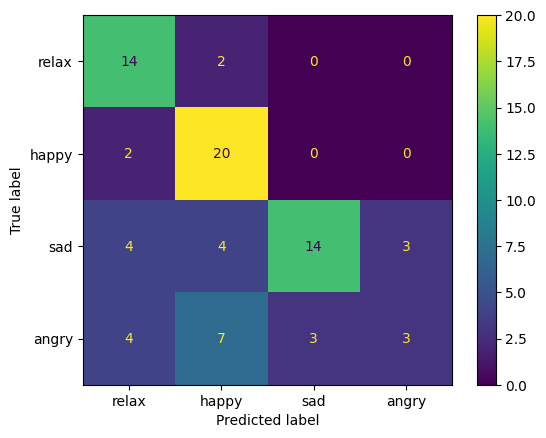

In [36]:
get_ConfusionMatrix(y_test, predictions)

#### Define function to make the classification report

In [28]:
from sklearn.metrics import classification_report

def get_report(y_test, predictions):
    target_names = ['relax', 'happy', 'sad', 'angry']

    report = classification_report(y_test, predictions, target_names = target_names)

    print(report)

### Make the classification report

In [29]:
get_report(y_test, predictions)

              precision    recall  f1-score   support

       relax       0.58      0.88      0.70        16
       happy       0.61      0.91      0.73        22
         sad       0.82      0.56      0.67        25
       angry       0.50      0.18      0.26        17

    accuracy                           0.64        80
   macro avg       0.63      0.63      0.59        80
weighted avg       0.65      0.64      0.60        80



## Decision Tree

Let's use Decision Tree classifier to predict if person will have heart disease or not

#### Load the libraries

In [37]:
from sklearn.tree import DecisionTreeClassifier

#### Create an instance of the model

In [38]:
treeClassifier = DecisionTreeClassifier()

#### Train the model

In [39]:
treeClassifier.fit(x_train, y_train)

DecisionTreeClassifier()

#### Make predictions on the test data

In [40]:
predictions = treeClassifier.predict(x_test)

### Make the Confusion Matrix

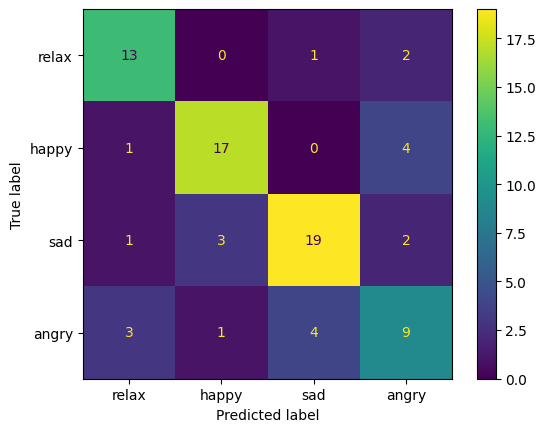

In [41]:
get_ConfusionMatrix(y_test, predictions)

### Get the Classification report

In [42]:
get_report(y_test, predictions)

              precision    recall  f1-score   support

       relax       0.72      0.81      0.76        16
       happy       0.81      0.77      0.79        22
         sad       0.79      0.76      0.78        25
       angry       0.53      0.53      0.53        17

    accuracy                           0.73        80
   macro avg       0.71      0.72      0.72        80
weighted avg       0.73      0.72      0.73        80



## Logistic Regression

Let's use Logistic Regression to predict if a person will have heart disease or not

#### Load the libraries

In [43]:
from sklearn.linear_model import LogisticRegression

#### Create an instance of the model

In [44]:
logisticClassifier = LogisticRegression()

### Normalize the data

In [45]:
# load the normalizer module
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# separate the data to be normalized
x_to_normalize = x
scaler.fit(x_to_normalize)

# transform the data
x_normalized = scaler.transform(x_to_normalize)

x_normalized

array([[-1.28562787,  0.73777505,  0.87387422, ..., -0.78271248,
        -2.45344953,  0.85686847],
       [-0.15010658, -2.26106992, -0.20459929, ...,  1.72377548,
        -0.93991736,  0.07493527],
       [-1.37895839,  1.68477873,  1.5070822 , ..., -0.08640603,
        -1.07877352, -0.96764234],
       ...,
       [ 0.81430876,  0.06698078, -1.06351386, ...,  1.72377548,
         0.68469974, -1.22828674],
       [ 0.08321971,  0.38264867, -1.17504981, ...,  1.72377548,
         0.57361481,  0.59622407],
       [-0.75675494, -1.55081717, -0.7916999 , ..., -1.20673835,
         1.08738261, -0.44635354]])

#### Get the dataframe back after normalization

In [46]:
x_transformed = pd.DataFrame(x_normalized, columns = x.columns)

x_transformed.head()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,-1.285628,0.737775,0.873874,0.186040,1.929915,0.541910,1.355820,0.172545,0.215926,0.391612,...,0.213319,1.144018,-1.060005,-0.818623,-0.220241,1.445837,0.173571,-0.782712,-2.453450,0.856868
1,-0.150107,-2.261070,-0.204599,0.542765,2.006331,0.826724,1.009163,1.330466,1.933997,3.738068,...,-1.054027,1.144018,-1.085369,1.721059,-0.779298,0.382761,-0.782346,1.723775,-0.939917,0.074935
2,-1.378958,1.684779,1.507082,1.885613,0.399089,1.547136,0.047359,1.083636,0.554411,0.499720,...,-0.510025,0.433595,-1.034642,1.767078,1.529065,2.253775,1.282434,-0.086406,-1.078774,-0.967642
3,0.005444,0.974526,1.447362,-1.687290,0.481769,2.755269,0.421205,1.163493,-0.861074,0.514462,...,-0.946422,1.144018,-0.574928,1.068162,1.691372,1.530883,0.402990,-1.515610,-0.370607,0.335580
4,-1.067857,0.737775,1.151836,-1.017563,0.952792,0.290603,1.107723,0.237882,1.308311,1.212255,...,-1.048049,-0.522958,2.085073,-1.106243,0.302747,1.445837,0.852271,-1.091584,-1.328715,-2.531509


### Split data into training and testing dataset

In [55]:
x_transformed_train, x_transformed_test, y_train, y_test = train_test_split(x_transformed, y_encoded, test_size = 0.2)

x_transformed_train

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
68,-0.321213,0.086710,0.836110,1.208574,-0.793502,0.413464,0.448394,0.375816,-0.281546,-1.451151,...,-0.270903,1.144018,-0.318122,0.889838,1.186418,0.361499,0.986100,-0.580385,0.309788,-0.706998
233,0.705423,0.027522,-0.122484,1.120628,1.891081,0.508402,0.003178,1.406693,0.354397,1.487441,...,1.426863,0.841949,0.731294,1.767078,0.501122,0.637899,-0.543367,-0.287657,-0.356721,0.856868
277,-0.585649,-0.228958,3.689059,-1.711799,-0.628143,-0.709038,2.066128,0.662574,0.523640,0.558689,...,-1.048049,-1.650124,-0.169111,-1.086110,-1.139980,0.446545,-0.486012,-0.287657,-1.287058,0.596224
24,-1.161187,-0.228958,0.269648,0.199932,-0.605594,1.357260,0.761065,1.533737,1.210868,3.197524,...,-0.309760,-0.738322,-0.327633,-0.916414,0.663429,0.382761,-1.145594,-0.690159,0.434759,0.596224
55,-0.647869,-0.209229,1.308601,1.708317,0.156061,1.796581,0.281863,-0.789365,-0.214874,-1.136653,...,-0.997236,1.144018,-1.085369,0.101760,-0.707162,1.807283,1.196401,-0.086406,-2.981103,-0.706998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,-0.554539,1.053443,-0.704315,-0.084261,-1.059079,0.139820,0.478982,0.364927,1.000597,0.686453,...,1.582292,0.509113,1.989959,1.327020,1.366759,-0.531485,1.961134,-0.287657,0.906870,0.335580
365,1.809834,-1.728380,-1.175928,1.569833,-0.397642,-0.556393,1.484967,-0.154141,0.810840,0.489892,...,-0.468178,-1.236177,0.198660,1.767078,-1.284253,-1.594561,-2.455200,0.517347,1.295667,-1.488931
199,0.285436,0.619400,0.425096,-0.105348,-1.588980,-3.918315,0.788254,0.230622,-1.661131,-0.807412,...,0.996444,-0.363532,2.085073,-0.556889,2.881622,1.573406,-1.327218,0.517347,0.268131,0.335580
85,-0.523429,-0.544626,-0.616492,-0.731761,2.509925,0.603340,-1.437828,-2.535321,-2.338103,-0.492914,...,-0.919521,1.144018,-1.082199,1.016391,-0.869469,0.404022,-0.868378,-1.483324,-1.287058,-1.228287


#### Train the model

In [56]:
logisticClassifier.fit(x_transformed_train, y_train)

LogisticRegression()

#### Make predictions

In [57]:
logistic_pred = logisticClassifier.predict(x_transformed_test)

### Make a confusion matrix

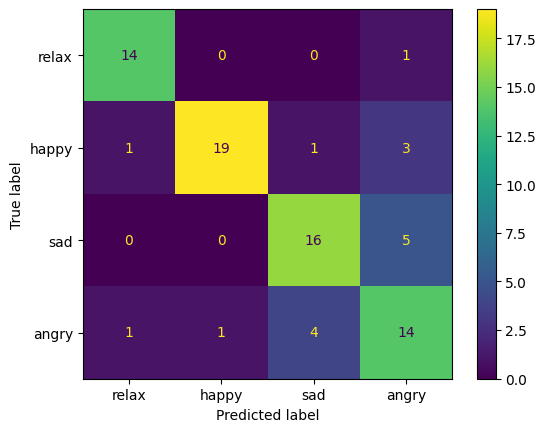

In [58]:
get_ConfusionMatrix(y_test, logistic_pred)

### Make the classification report

In [59]:
get_report(y_test, logistic_pred)

              precision    recall  f1-score   support

       relax       0.88      0.93      0.90        15
       happy       0.95      0.79      0.86        24
         sad       0.76      0.76      0.76        21
       angry       0.61      0.70      0.65        20

    accuracy                           0.79        80
   macro avg       0.80      0.80      0.79        80
weighted avg       0.80      0.79      0.79        80



## KNN

Let's use KNN to predict if a person will have heart disease or not

#### Load the libraries

In [60]:
from sklearn.neighbors import KNeighborsClassifier

#### Create an instance of the model

In [91]:
knn = KNeighborsClassifier(n_neighbors = 9)

#### Train the model

In [92]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

#### Make the predictions

In [93]:
predictions = knn.predict(x_test)

### Make the Confusion Matrix

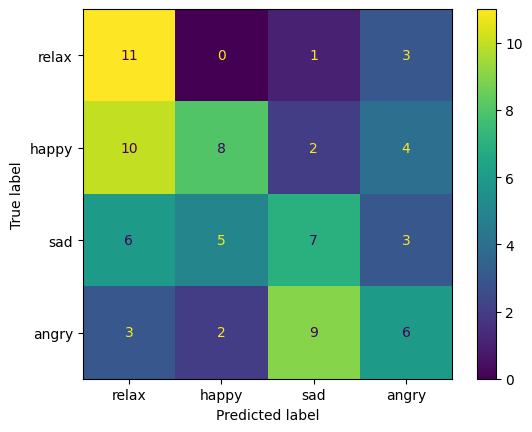

In [94]:
get_ConfusionMatrix(y_test, predictions)

### Make the Classification Report

In [95]:
get_report(y_test, predictions)

              precision    recall  f1-score   support

       relax       0.37      0.73      0.49        15
       happy       0.53      0.33      0.41        24
         sad       0.37      0.33      0.35        21
       angry       0.38      0.30      0.33        20

    accuracy                           0.40        80
   macro avg       0.41      0.42      0.40        80
weighted avg       0.42      0.40      0.39        80



### Through our implementation, the best results we obtained using the Logistic Regression algorithm with accuracy of around 80%.